In [287]:
# imported important libraries


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, chi2
%matplotlib inline

In [288]:
#reading training dataset

df = pd.read_csv("train.csv")   
df.head()

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,variety
0,NaN,Australia,Andrew Peace 2007 Peace Family Vineyard Chardo...,"Classic Chardonnay aromas of apple, pear and h...",Peace Family Vineyard,83,10.0,Australia Other,South Eastern Australia,NaN,Andrew Peace,Chardonnay
1,@wawinereport,US,North by Northwest 2014 Red (Columbia Valley (...,This wine is near equal parts Syrah and Merlot...,NaN,89,15.0,Washington,Columbia Valley (WA),Columbia Valley,North by Northwest,Red Blend
2,NaN,Italy,Renato Ratti 2007 Conca (Barolo),Barolo Conca opens with inky dark concentratio...,Conca,94,80.0,Piedmont,Barolo,NaN,Renato Ratti,Nebbiolo
3,@vossroger,France,Domaine l'Ancienne Cure 2010 L'Abbaye White (B...,It's impressive what a small addition of Sauvi...,L'Abbaye,87,22.0,Southwest France,Bergerac Sec,NaN,Domaine l'Ancienne Cure,Bordeaux-style White Blend
4,@vossroger,France,Château du Cèdre 2012 Le Cèdre Vintage Malbec ...,"This ripe, sweet wine is rich and full of drie...",Le Cèdre Vintage,88,33.0,France Other,Vin de Liqueur,NaN,Château du Cèdre,Malbec


In [289]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82657 entries, 0 to 82656
Data columns (total 12 columns):
user_name             63264 non-null object
country               82622 non-null object
review_title          82657 non-null object
review_description    82657 non-null object
designation           59010 non-null object
points                82657 non-null int64
price                 77088 non-null float64
province              82622 non-null object
region_1              69903 non-null object
region_2              35949 non-null object
winery                82657 non-null object
variety               82657 non-null object
dtypes: float64(1), int64(1), object(10)
memory usage: 7.6+ MB


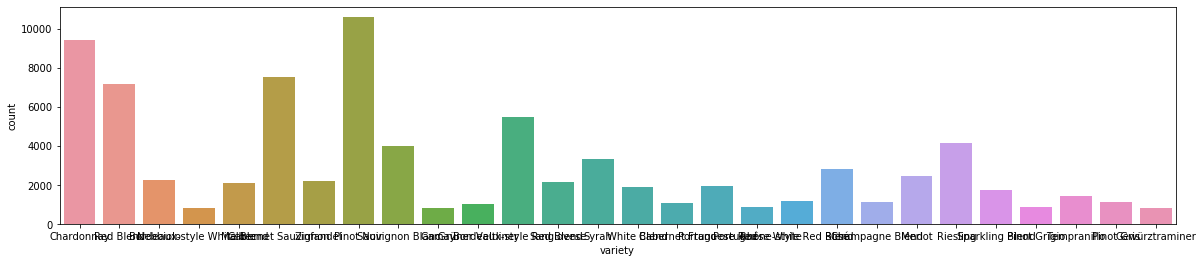

In [290]:
plt.figure(figsize = (20,4))
sns.countplot('variety',data = df)

In [291]:
#removing columns
df.drop(['user_name','review_title','review_description','designation','winery','region_2'],axis = 1, inplace = True)

In [292]:
df

,country,points,price,province,region_1,variety
0,Australia,83,10.0,Australia Other,South Eastern Australia,Chardonnay
1,US,89,15.0,Washington,Columbia Valley (WA),Red Blend
2,Italy,94,80.0,Piedmont,Barolo,Nebbiolo
3,France,87,22.0,Southwest France,Bergerac Sec,Bordeaux-style White Blend
4,France,88,33.0,France Other,Vin de Liqueur,Malbec
...,...,...,...,...,...,...
82652,Spain,84,12.0,Northern Spain,Rioja,Tempranillo
82653,US,85,21.0,New Mexico,New Mexico,Cabernet Sauvignon
82654,France,87,14.0,Beaujolais,Beaujolais-Villages,Gamay
82655,France,91,20.0,Bordeaux,Haut-Médoc,Bordeaux-style Red Blend


In [293]:
#cateogrical columns to new columns

Country = pd.get_dummies(df["country"],drop_first = True)
Region_1 = pd.get_dummies(df["region_1"],drop_first = True)
Province = pd.get_dummies(df["province"],drop_first = True)


In [295]:
# merging all dataframes

df = pd.concat([df,Country,Province,Region_1],axis = 1)

In [296]:
df.drop(['country','province','region_1'],axis = 1, inplace = True)

In [297]:
df = df.dropna()

In [298]:
df

,points,price,variety,Australia,Austria,Brazil,Bulgaria,Canada,Chile,Croatia,...,Yadkin Valley,Yakima Valley,Yamhill County,Yarra Valley,Yecla,Yolo County,York Mountain,Yorkville Highlands,Yountville,Zonda Valley
0,83,10.0,Chardonnay,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,89,15.0,Red Blend,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,94,80.0,Nebbiolo,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,87,22.0,Bordeaux-style White Blend,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,88,33.0,Malbec,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82652,84,12.0,Tempranillo,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
82653,85,21.0,Cabernet Sauvignon,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
82654,87,14.0,Gamay,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
82655,91,20.0,Bordeaux-style Red Blend,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [299]:
# Feature selection


X = df.drop('variety',axis = 1)  #independent columns
y = df['variety']    #target column 
#apply SelectKBest class to extract top 68 best features
bestfeatures = SelectKBest(score_func=chi2, k=68)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(68,'Score'))  #print 68 best features

                 Specs          Score
1                price  267585.548789
59          Beaujolais   69024.935833
271           Piedmont   68063.593266
28            Portugal   66574.146867
100          Champagne   50351.975889
...                ...            ...
1011       Napa Valley    5258.437904
318   Southwest France    4912.096282
627             Collio    4757.265751
382         Washington    4658.070757
244           New York    4541.728324

[68 rows x 2 columns]


In [300]:
p = list(featureScores.nlargest(68,'Score')['Specs'])

In [301]:
# Dataframe with these 68 important feature

X = df[p]
X

,price,Beaujolais,Beaujolais,Piedmont,Piedmont,Portugal,Portugal,Champagne,Champagne,Champagne,...,Côtes du Rhône,Weinviertel,Bordeaux Supérieur,Napa Valley,Southwest France,Collio,Washington,Washington,New York,New York
0,10.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,15.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,80.0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,22.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,33.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82652,12.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
82653,21.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
82654,14.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
82655,20.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [302]:
from sklearn.model_selection import train_test_split

In [303]:

y = df['variety']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [304]:
from sklearn.tree import DecisionTreeClassifier

In [305]:
#appliying Decision tree classifier

dtree = DecisionTreeClassifier()

In [306]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [307]:
predictions = dtree.predict(X_test)

In [308]:
from sklearn.metrics import classification_report,confusion_matrix

In [309]:
print(classification_report(y_test,predictions))

                            precision    recall  f1-score   support

  Bordeaux-style Red Blend       0.71      0.63      0.67      1435
Bordeaux-style White Blend       0.78      0.60      0.68       179
            Cabernet Franc       0.18      0.08      0.11       364
        Cabernet Sauvignon       0.35      0.39      0.37      2470
           Champagne Blend       0.77      0.81      0.79       320
                Chardonnay       0.28      0.40      0.33      2985
                     Gamay       0.95      0.92      0.93       241
            Gewürztraminer       0.29      0.14      0.19       256
          Grüner Veltliner       0.61      0.74      0.66       307
                    Malbec       0.54      0.62      0.58       689
                    Merlot       0.12      0.05      0.07       784
                  Nebbiolo       0.97      0.94      0.95       618
              Pinot Grigio       0.50      0.41      0.45       263
                Pinot Gris       0.40      0.29